In [1]:
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [6]:
rank_stars = {}
for rank in range(15,21):
    rank_stars[rank] = 3
for rank in range(10,16):
    rank_stars[rank] = 4
for rank in range(1,11):
    rank_stars[rank] = 5

In [20]:
np.arange(0.5,0.725,0.025)

array([ 0.5  ,  0.525,  0.55 ,  0.575,  0.6  ,  0.625,  0.65 ,  0.675,  0.7  ])

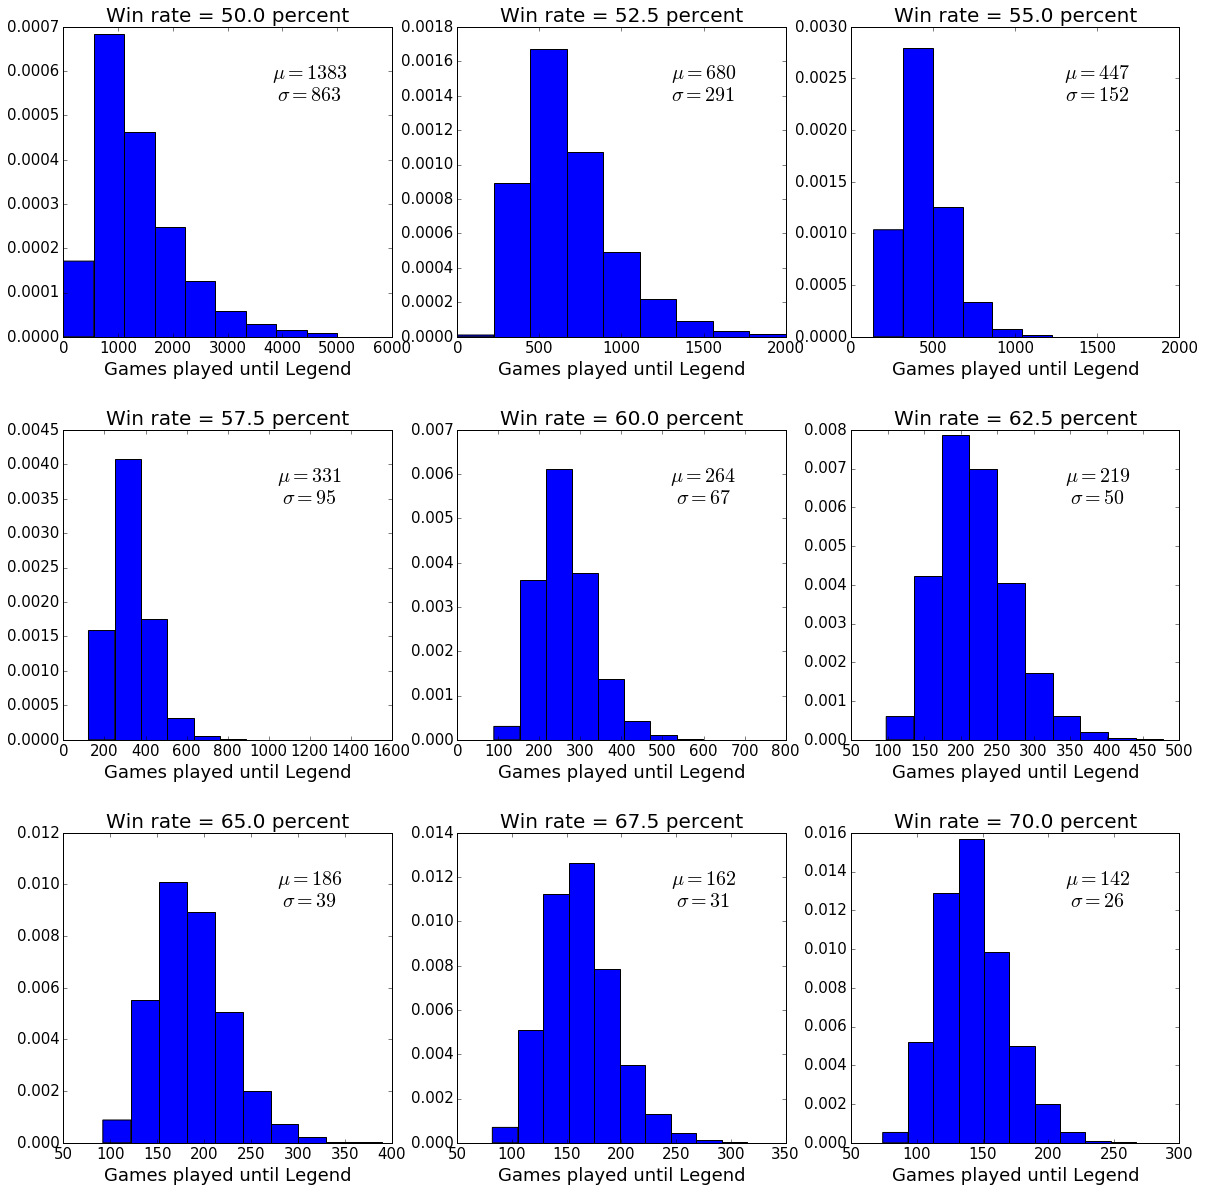

In [18]:
fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
k=0
for winrate in np.arange(0.5,0.725,0.025):
    legend_games = []
    k+=1
    ax = fig.add_subplot(3,3,k)
    for i in range(10000):
        game=0
        current_rank = 20
        current_stars = 1
        bonus = 0
        while True:
            game+=1
            if np.random.random() <= winrate:
                bonus+=1
                if current_rank == 1 and current_stars==5:
#                 if current_rank == 6 and (current_stars==5 or (current_stars==4 and bonus>=3)):
                    legend_games.append(game)
                    break
                elif bonus >= 3 and current_rank > 5:
                    if current_stars == rank_stars[current_rank]:
                        current_rank -= 1
                        current_stars = 2
                    elif current_stars == rank_stars[current_rank]-1:
                        current_rank -= 1
                        current_stars = 1
                    else:
                        current_stars += 2            
                else:
                    if current_stars == rank_stars[current_rank]:
                        current_rank -= 1
                        current_stars = 1
                    else:
                        current_stars += 1
            else:
                bonus=0
                if current_rank == 20 and current_stars ==1:
                    pass
                elif current_stars == 1:
                    current_rank += 1
                    current_stars = rank_stars[current_rank]
                else:
                    current_stars -= 1
    ax.hist(legend_games,normed=True)
    ax.text(0.75,0.85,r'$\mu = %d$' % np.mean(legend_games),fontsize=20,
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
    ax.text(0.75,0.78,r'$\sigma = %d$' % np.std(legend_games),fontsize=20,
        horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
    ax.set_title('Win rate = %.1f percent' % (winrate*100.),fontsize=20)
    ax.set_xlabel('Games played until Legend',fontsize=18)
    ax.tick_params(labelsize=15)
plt.savefig('fixed_win_rates.png')

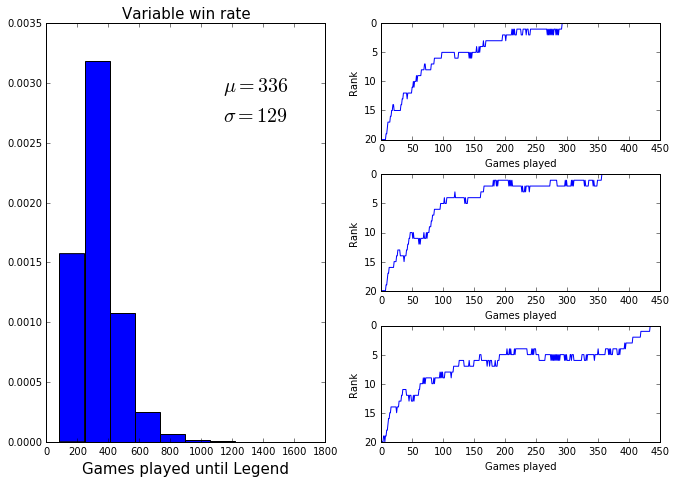

In [11]:
fig = plt.figure(figsize=(11,7.5))
plt.subplots_adjust(hspace=0.3)
k=0
legend_games = []
k+=1
winrate_by_rank = {}
for rank in range(15,21):
    winrate_by_rank[rank] = 0.7
for rank in range(10,16):
    winrate_by_rank[rank] = 0.65
for rank in range(5,11):
    winrate_by_rank[rank] = 0.6
for rank in range(0,6):
    winrate_by_rank[rank] = 0.55
    
traces = [[],[],[]]
    
for i in range(10000):
    ranks = []
    game=0
    current_rank = 20
    current_stars = 1
    bonus = 0
    while True:
        ranks.append(current_rank)
        game+=1
        if np.random.random() <= winrate_by_rank[current_rank]:
            bonus+=1
            if current_rank == 1 and current_stars==5:
#             if current_rank == 6 and (current_stars==5 or (current_stars==4 and bonus==3)):
                ranks.append(0)
                legend_games.append(game)
                if 280<game<300:
                    traces[0] = ranks
                if 350<game<370:
                    traces[1] = ranks
                if 430<game<450:
                    traces[2] = ranks
                break
            elif bonus >= 3 and current_rank > 5:
                if current_stars == rank_stars[current_rank]:
                    current_rank -= 1
                    current_stars = 2
                elif current_stars == rank_stars[current_rank]-1:
                    current_rank -= 1
                    current_stars = 1
                else:
                    current_stars += 2            
            else:
                if current_stars == rank_stars[current_rank]:
                    current_rank -= 1
                    current_stars = 1
                else:
                    current_stars += 1
        else:
            bonus=0
            if current_rank == 20 and current_stars ==1:
                pass
            elif current_stars == 1:
                current_rank += 1
                current_stars = rank_stars[current_rank]
            else:
                current_stars -= 1
    
ax = plt.subplot2grid((3,2),(0,0),rowspan=3)
ax.hist(legend_games,normed=True)
ax.text(0.75,0.85,r'$\mu = %d$' % np.mean(legend_games),fontsize=20,
    horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.text(0.75,0.78,r'$\sigma = %d$' % np.std(legend_games),fontsize=20,
    horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
ax.set_title('Variable win rate',fontsize=15)
ax.set_xlabel('Games played until Legend',fontsize=15)
ax2 = plt.subplot2grid((3,2),(0,1))
ax2.plot(np.arange(len(traces[0]))+1,traces[0])
ax2.invert_yaxis()
ax2.set_xlabel('Games played')
ax2.set_ylabel('Rank')
ax2.set_xlim(0,450)
ax3 = plt.subplot2grid((3,2),(1,1))
ax3.plot(np.arange(len(traces[1]))+1,traces[1])
ax3.invert_yaxis()
ax3.set_xlabel('Games played')
ax3.set_ylabel('Rank')
ax3.set_xlim(0,450)
ax4 = plt.subplot2grid((3,2),(2,1))
ax4.plot(np.arange(len(traces[2]))+1,traces[2])
ax4.invert_yaxis()
ax4.set_xlabel('Games played')
ax4.set_ylabel('Rank')
ax4.set_xlim(0,450)
#plt.show()
plt.savefig('variable_win_rate_rank5.png')
plt.show()